# **Ahmet Selçuk KÜREN Staj Çalışmaları**
## **Regresyon**

Regresyon bir bağımlı değişken ile diğer birkaç bağımsız değişken arasındaki ilişkiyi belirler. Regresyon analizi, bağımsız değişkenlerin bazıları değiştiğinde bağımlı değişkenin nasıl değiştiğini anlamaya yardımcı olmaktadır.



**Linear Regression**

Doğrusal korelasyon ve basit doğrusal regresyon, iki değişken arasındaki doğrusal ilişkiyi inceleyen istatistiksel yöntemlerdir. Burada şu farklılığı vurgulamakta fayda var: Korelasyon, iki değişkenin ne kadar ilişkili olduğunu gösterirken, doğrusal regresyon, iki değişken arasındaki ilişkiye dayanarak birinin değerini diğerinden tahmin etmeyi sağlayan bir denklem (model) oluşturmayı içerir.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("advertising.csv")
df.shape

X = df[["TV"]]
y = df[["sales"]]

Model oluşturma

In [3]:
reg_model = LinearRegression().fit(X, y)

# y_hat = b + w*TV

# sabit (b - bias)
reg_model.intercept_[0]

# tv'nin katsayısı (w1)
reg_model.coef_[0][0]

0.04753664043301975

In [4]:
# Tahmin


# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

reg_model.intercept_[0] + reg_model.coef_[0][0]*150

# 500 birimlik tv harcaması olsa ne kadar satış olur?

reg_model.intercept_[0] + reg_model.coef_[0][0]*500

df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


Modelin Görselleştirilmesi

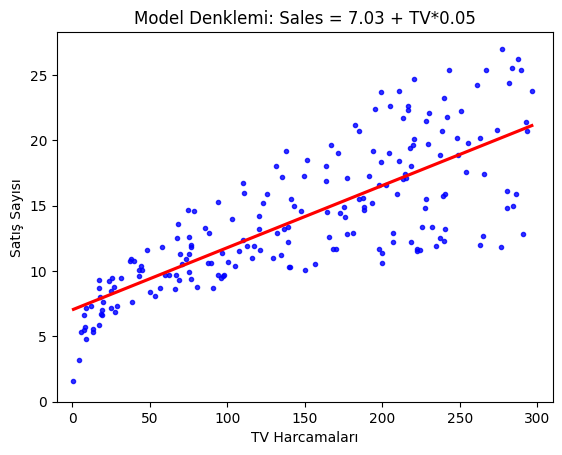

In [5]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

**Tahmin Başarısı**

**Ortalama Kare Hatası (Mean Squared Error (MSE)) :**Ortalama Kare Hatası tahmin edilen sonuçlarınızın gerçek sayıdan ne kadar farklı olduğuna dair size mutlak bir sayı verir.



In [6]:
# MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)
# 10.51
y.mean()
y.std()

sales   5.22
dtype: float64

**Kök Ortalama Kare Hatası (Root Mean Squared Error (RMSE)) :** Kök Ortalama Karekök Hatası (RMSE), MSE’nin kareköküdür. MSE’den daha sık kullanılır çünkü bazen MSE değeri kolayca karşılaştırılamayacak kadar büyük olabilir.

In [7]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))
# 3.24

3.2423221486546887

**Ortalama Mutlak Hata (Mean Absolute Error (MAE)) :**
Ortalama mutlak hata, mutlak hata değerinin toplamını alır, hata terimlerinin toplamının daha doğrudan bir temsilidir.

In [8]:
# MAE
mean_absolute_error(y, y_pred)
# 2.54

2.549806038927486

**R Kare / Düzeltilmiş R Kare :**
R kare, modeldeki bağımsız değişkenlere göre bağımlı değişkenin varyasyon oranını yani bağımlı değişkendeki değişkenliğin ne kadarının model tarafından açıklanabileceğini ölçer.

In [9]:
# R-KARE
reg_model.score(X, y)


0.611875050850071

## Multiple Linear Regression

In [10]:
df = pd.read_csv("advertising.csv")

X = df.drop('sales', axis=1)

y = df[["sales"]]

Model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

y_test.shape
y_train.shape

reg_model = LinearRegression().fit(X_train, y_train)

# sabit (b - bias)
reg_model.intercept_

# coefficients (w - weights)
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

# **Logistic Regression**

Lojistik regresyon, isminde “regresyon” geçmesine rağmen bir sınıflandırma algoritmasıdır. Yani görseldeki hayvanın kedi mi, köpek mi olduğu veya verilmiş olan bilgilerin bir erkeğe mi yoksa bir kadına mı ait olduğunu tahmin etme gibi iki sınıflı sınıflandırma problemlerinde sıkça kullanılır.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate

Gerekli fonksiyonlar (bunlara feature engineering de değinmiştik.)

In [14]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)


In [15]:
df = pd.read_csv("diabetes.csv")

**Target'ın Analizi**

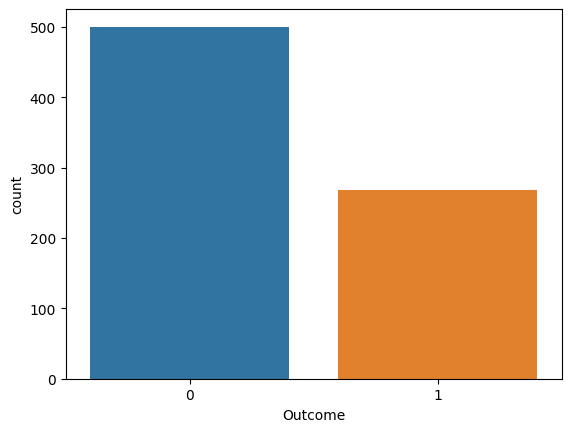

0   65.104
1   34.896
Name: Outcome, dtype: float64

In [16]:
df["Outcome"].value_counts()

sns.countplot(x="Outcome", data=df)
plt.show()

100 * df["Outcome"].value_counts() / len(df)

Feature'ların Analizi

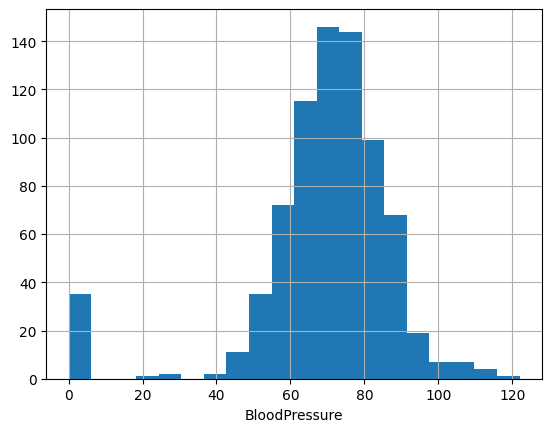

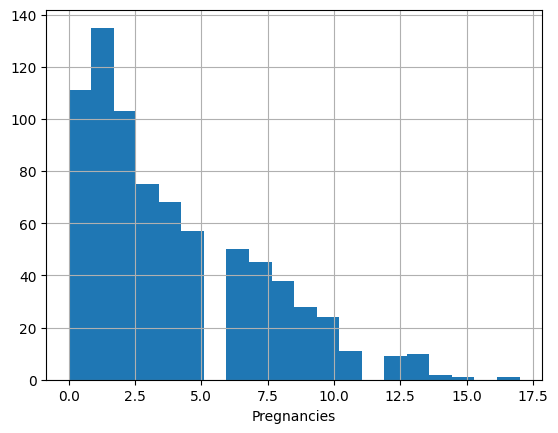

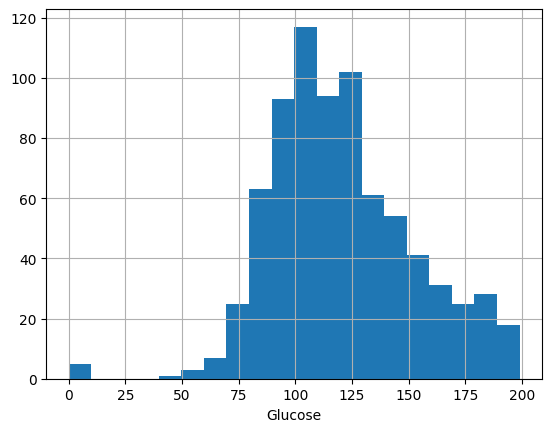

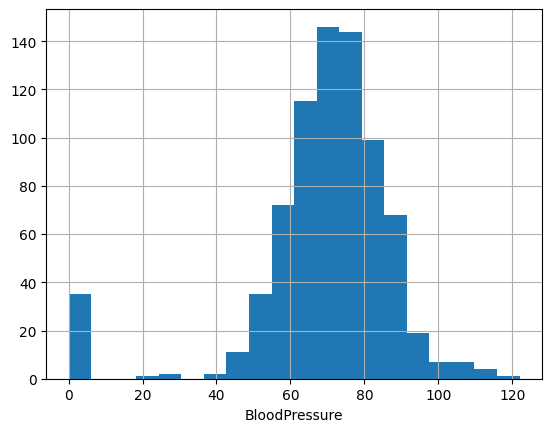

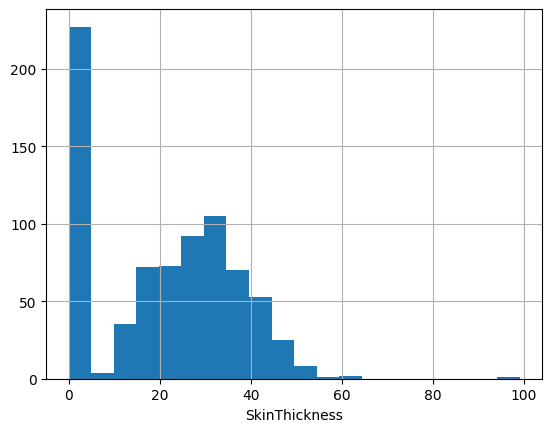

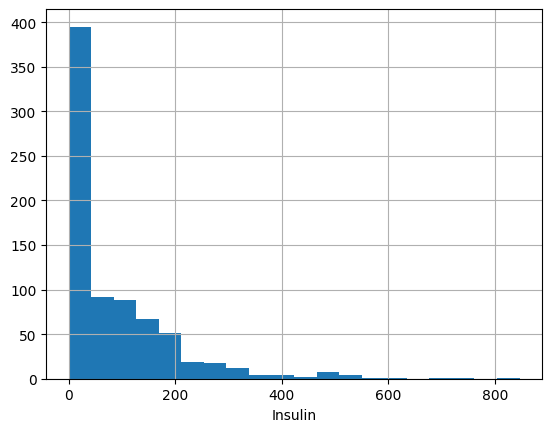

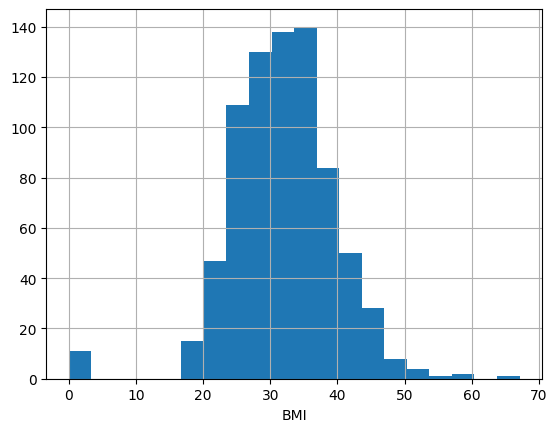

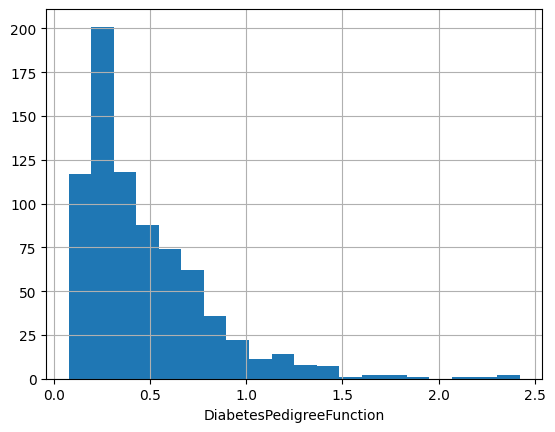

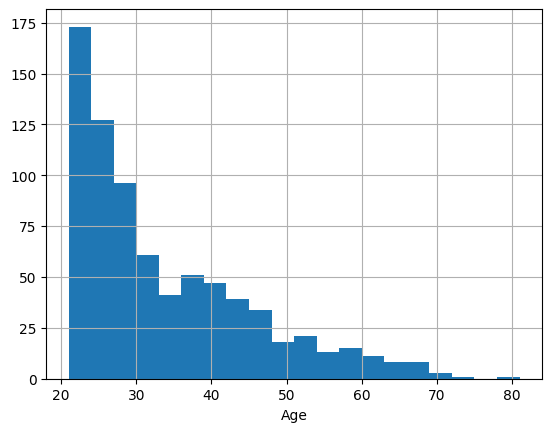

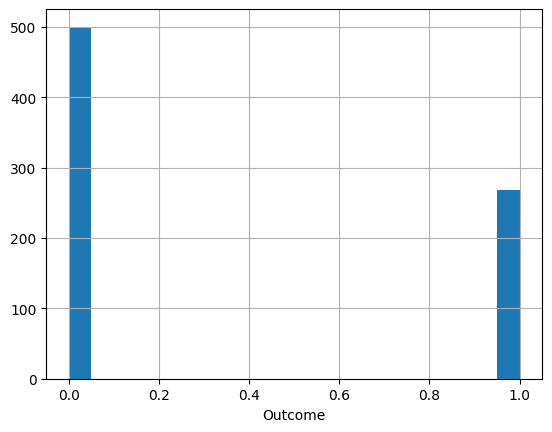

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [17]:
df.head()

df["BloodPressure"].hist(bins=20)
plt.xlabel("BloodPressure")
plt.show()

def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)


for col in df.columns:
    plot_numerical_col(df, col)

cols = [col for col in df.columns if "Outcome" not in col]


# for col in cols:
#     plot_numerical_col(df, col)

df.describe().T

Target vs Features

In [18]:
df.groupby("Outcome").agg({"Pregnancies": "mean"})

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0              3.298
1              4.866


         Glucose
Outcome         
0        109.980
1        141.257


         BloodPressure
Outcome               
0               68.184
1               70.825


         SkinThickness
Outcome               
0               19.664
1               22.164


         Insulin
Outcome         
0         68.792
1        100.336


           BMI
Outcome       
0       30.304
1       35.143


         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550


           Age
Outcome       
0       31.190
1       37.067




Data Preprocessing (Veri Ön İşleme)

In [19]:
df.shape
df.head()

df.isnull().sum()

df.describe().T

for col in cols:
    print(col, check_outlier(df, col))

replace_with_thresholds(df, "Insulin")

for col in cols:
    df[col] = RobustScaler().fit_transform(df[[col]])

df.head()

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.600,0.752,0.000,0.375,-0.240,0.172,0.665,1.235,1
1,-0.400,-0.776,-0.333,0.188,-0.240,-0.581,-0.056,0.118,0
2,1.000,1.600,-0.444,-0.719,-0.240,-0.935,0.783,0.176,1
3,-0.400,-0.679,-0.333,0.000,0.499,-0.419,-0.537,-0.471,0
4,-0.600,0.485,-1.778,0.375,1.081,1.194,5.008,0.235,1


Model & Prediction

In [20]:
y = df["Outcome"]

X = df.drop(["Outcome"], axis=1)

log_model = LogisticRegression().fit(X, y)

log_model.intercept_
log_model.coef_

y_pred = log_model.predict(X)

y_pred[0:10]

y[0:10]


0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64